In [1]:
import sys
sys.path.append('../')
import libs.rendering as rr
import libs.data as data
import libs.stats as stats
import libs.utils as utils
import pandas as pd
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [3]:
df = data.load_dataframe('../datasets/base/asag_v1_en.csv')
rounded_score = np.round(df['Score'])
df['Score'] = rounded_score
df[['AID','QID', 'Prompt','Model Answer', 'Student Answer', 'Score']].head()

AID  QID                                   Prompt  \
0    1    1  What does a function signature include?   
1    1    1  What does a function signature include?   
2    1    1  What does a function signature include?   
3    1    1  What does a function signature include?   
4    1    1  What does a function signature include?   

                                        Model Answer  \
0  The name of the function and the types of the ...   
1  The name of the function and the types of the ...   
2  The name of the function and the types of the ...   
3  The name of the function and the types of the ...   
4  The name of the function and the types of the ...   

                                      Student Answer  Score  
0  It includes the name of the program, the type ...    4.0  
1  it includes the specific information about the...    3.0  
2  The function signature includes the name of th...    5.0  
3  A function signature consists of the function ...    4.0  
4  It includes the name of the function and the t...    5.0

In [13]:
monkey_grades = np.random.choice(np.arange(6),replace=True, size=len(df))

stats.print_all_stats(df['Score'], monkey_grades)

             precision    recall  f1-score   support

        0.0       0.01      0.08      0.02        13
        1.0       0.00      0.00      0.00         5
        2.0       0.09      0.11      0.10        70
        3.0       0.06      0.10      0.07        58
        4.0       0.33      0.19      0.24       198
        5.0       0.45      0.17      0.25       286

avg / total       0.32      0.16      0.21       630

Pearson's R: 0.002904455191021775
Cohen's Kappa: -0.013003623960776034
MAE: 1.446031746031746
Accuracy: 16.19%
Precision: 32.22%
Recall: 16.19%
F1-Measure: 20.68%


In [14]:
df2 = data.load_dataframe('../datasets/final/en/asag_v2_en_full.csv')
df2['Feedback_Notes'] = df2['Feedback_Notes'].replace(np.nan, '')

### 1. What percentage of Partially Correct Answers have the Missed Concept Label?

In [15]:
# What percentage of the partially correct contain missed_concept?
partially_correct = df2[df2['Feedback'].str.contains('partially_correct')].copy()
len(partially_correct[partially_correct['Feedback_Notes'].str.contains('missed_concept')]) / len(partially_correct)

0.5454545454545454

### 2. How often do misspellings and question misunderstandings occur?

In [20]:
misinterp = df2[df2['Feedback_Notes'].str.contains('question_misinterpretation')]
print(len(misinterp) / len(df2))

misspell = df2[df2['Feedback_Notes'].str.contains('misspelling')]
print(len(misspell) / len(df2))

0.01638001638001638
0.030303030303030304


### 3. How many responses are off topic?

In [23]:
wu = df2[df2['Feedback'].str.contains('wrong_unrelated')]
print(len(wu) / len(df2))

0.038083538083538086


### 4. What are the statistics for the 3-Class Problem?

In [31]:
score3 = utils.convert_to_class3(df2['Score'])
myScore3 = utils.convert_to_class3(df2['MyScore'])
stats.print_all_stats(score3, myScore3)

             precision    recall  f1-score   support

        0.0       0.31      0.89      0.46       192
        1.0       0.44      0.28      0.34       479
        2.0       0.93      0.83      0.88      1771

avg / total       0.78      0.73      0.74      2442

Pearson's R: 0.6486795897669911
Cohen's Kappa: 0.43871799439894454
MAE: 0.22317772317772316
Accuracy: 72.69%
Precision: 78.32%
Recall: 72.69%
F1-Measure: 73.85%


In [24]:
# Styles
df = pd.DataFrame([[0.46,0.74, 0.80]], columns=['6-Class', '3-Class', '2-Class'])

rr.render_accuracy_scores(df, title={ 'title' : 'Human Expert Grader', 'fontsize' : 24},
                          cols=['6-Class', '3-Class', '2-Class'], ylim=100,
                         axis_labels={'xlabel' : 'Classification Size', 'ylabel' : 'F1 Score', 'fontsize' : 20},
                         xticks=['   '],
                         savefile='./renderings/')

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


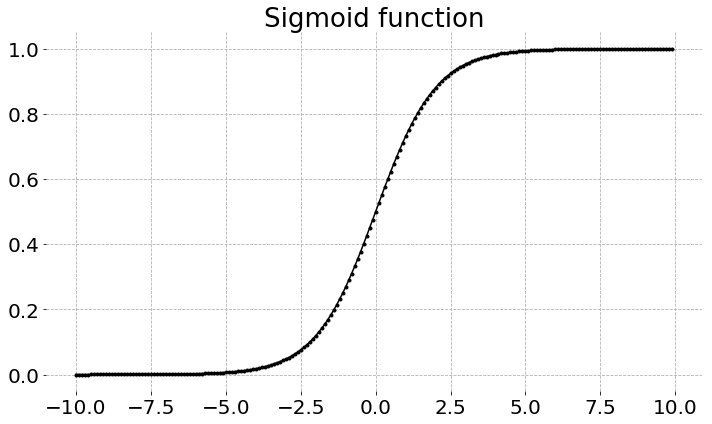

In [24]:
np.random.seed(42)

ax1 = np.random.choice(np.arange(3,8), size=100)
bx1 = np.random.choice(np.arange(0,4), size=100)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))



from cycler import cycler

# Styles
monochrome = (cycler('color', ['k']) * cycler('linestyle',
                                              ['-', '--', ':', '=.']) * cycler('marker', ['.', ',', '.']))
bar_cycle = (cycler('hatch', ['///', '--', '...', '\///', 'xxx',
                              '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
styles = bar_cycle()


def plot_sigmoid(x, title, xticks=[], axis_labels={}, number_info={'fontsize':18, 'xoffset': -0.1, 'yoffset' : 0.8}, savefile=''):

    fig, ax = plt.subplots(1, 1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_prop_cycle(monochrome)
    
    # Grid Setup
    ax.grid(linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Labels
    ax.set_title(title['title'], size=title['fontsize'])
    if len(axis_labels) > 0:
        ax.set(xlabel=axis_labels['xlabel'])
        ax.xaxis.label.set_fontsize( axis_labels['fontsize'])
        # ax.xaxis.padlabel = 40
        ax.set(ylabel=axis_labels['ylabel'])
        ax.yaxis.label.set_fontsize( axis_labels['fontsize'])
    
    hatches = ['//', 'xxx', '\\', '///', 'xx']
    #plt.legend('best', labels=labels)
    #plt.xticks(x + width, xticks)
    
    ax.plot(x, sigmoid(x))
        
    
    plt.tight_layout()
    if len(savefile) > 0:
        plt.savefig('{}'.format(savefile))
    plt.show()
    
    
x = np.arange(-10,10,0.1)
plot_sigmoid(x, {'title' : 'Sigmoid function', 'fontsize' : 26})